### Reading in Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%autosave 60
import gdown

from google.colab import drive

# # Download the training data from drive
URL = 'https://drive.google.com/uc?export=download&id=1CxEHwUl_X-E05x1_2ML2u_CslEvBE0nM'
gdown.download(URL, "IMDB Dataset.csv", quiet=True)

# # Read in the training data to a pandas dataframe
# df = pd.read_csv("IMDB Dataset.csv")
# df.head()

#from google.colab import drive
# drive.mount('/content/drive')

# Mount Google Drive before running this code
# df = pd.read_csv('/content/drive/MyDrive/Stats 101C/IMDB Dataset.csv')
df = pd.read_csv('IMDB Dataset.csv')
df.head()

Autosaving every 60 seconds


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.review.iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.sentiment.iloc[0]

'positive'

### Natural Language Processing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# get the default English stop words list
stop_words = stopwords.words('english')

# we want to add our own negations
custom_stop_words_to_remove = ['no', 'nor', 'not', 'dont', 'should', "should've",
                               "aren't", "couldn't", "didn't",
                               "doesn't",
    "hadn't", "hasn't", "haven't", "isn't",
    "mightn't", "mustn't", "needn't",
    "shan't", "shouldn't", "wasn't",
    "weren't", "won't", "wouldn't"]

custom_stop_words = [word for word in stop_words if word not in custom_stop_words_to_remove]

print(custom_stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
!pip install -U contractions --quiet

import re
import string
from nltk.corpus import stopwords
import contractions

stop_words = stopwords.words('english')

def custom_preprocessor(text):
    text = contractions.fix(text) #fix contractoins
    text = text.lower() # convert to lowercase
    text = re.sub('\[.*?\]', '', text) # remove square brackets, including the brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove hyperlinks starting with 'http://' or 'https://' and links starting with 'www.'
    text = re.sub('<.*?>+', '', text) # remove HTML tags like <br>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\d+', '', text) # remove numbers
    text = re.sub('\n', '', text) # remove newline characters
    return text

# apply preprocessing to the 'review' column
df['new_review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop_words]))
df['new_review'] = df['new_review'].apply(custom_preprocessor)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
# lemmatization helps

nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

lemmatized_reviews = [lemmatize_sentence(review) for review in df['new_review']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# include if you want lemmatized reviews
df['new_review'] = lemmatized_reviews

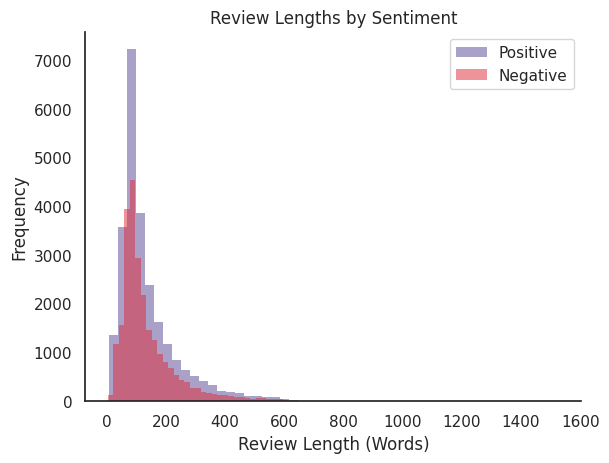

In [ ]:
import seaborn as sns

sns.set(style="white")

fig, ax = plt.subplots()

sns.histplot(df[df.sentiment == 'positive'].new_review.apply(lambda x: len(x.split())),
             bins=50, color='#564592', label='Positive', kde=False, alpha=0.5, ax=ax,
             edgecolor='none')
sns.histplot(df[df.sentiment == 'negative'].new_review.apply(lambda x: len(x.split())),
             bins=50, color='#DF2935', label='Negative', kde=False, alpha=0.5, ax=ax,
             edgecolor='none')

plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.title('Review Lengths by Sentiment')

plt.legend()

sns.despine()
plt.savefig("review_length_histogram.png")
plt.show()

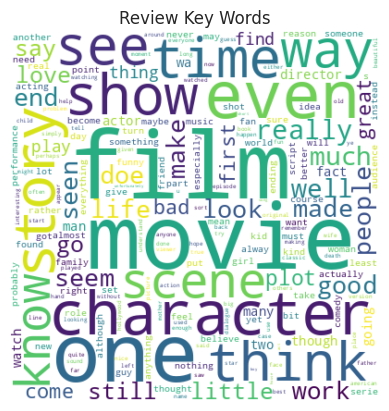

In [ ]:
!pip install wordcloud --quiet

from wordcloud import WordCloud

text = ' '.join(df.new_review)

wordcloud = WordCloud(width=400, height=400, background_color='white', max_font_size=100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Review Key Words')
plt.show()

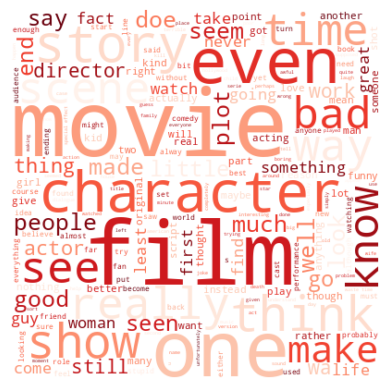

In [ ]:
negative_text = ' '.join(df[df.sentiment == 'negative'].new_review)

wordcloud = WordCloud(width=400, height=400, background_color='white', max_font_size=100, colormap = 'Reds').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("negative_wordcloud.png")

In [ ]:
positive_text = ' '.join(df[df.sentiment == 'positive'].new_review)

wordcloud = WordCloud(width=400, height=400, background_color='white', max_font_size=100, colormap='Blues').generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("positive_wordcloud.png")

In [ ]:
# We've decided not to use stemming: removes context for Word2Vec
# and no improvements for TF-IDF

'''
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

stemmed_reviews = [stem_sentence(review) for review in df['new_review']]

#print("Original Sentence:", movie_reviews[0])
#print("Stemmed Sentence:", stemmed_reviews[0])
'''

'\nnltk.download(\'punkt\')\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import word_tokenize\n\nstemmer = PorterStemmer()\n\ndef stem_sentence(sentence):\n    words = word_tokenize(sentence)\n    stemmed_words = [stemmer.stem(word) for word in words]\n    return \' \'.join(stemmed_words)\n\nstemmed_reviews = [stem_sentence(review) for review in df[\'new_review\']]\n\n#print("Original Sentence:", movie_reviews[0])\n#print("Stemmed Sentence:", stemmed_reviews[0])\n'

In [ ]:
# include if you want stemmed reviews
# df['new_review'] = stemmed_reviews

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pd.set_option('display.max_colwidth', 100)
for i in range(5):
  print(df.loc[i, ['review', 'new_review']])

review        One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....
new_review    one reviewer mentioned watching oz episode hooked they right exactly happened methe first thing ...
Name: 0, dtype: object
review        A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...
new_review    a wonderful little production the filming technique unassuming oldtimebbc fashion give comfortin...
Name: 1, dtype: object
review        I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...
new_review    i thought wonderful way spend time hot summer weekend sitting air conditioned theater watching l...
Name: 2, dtype: object
review        Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...
new_review    basically there is family little boy jake think there is zombie closet parent fighting timethis ...
Name: 3, dtype: obj

### Word2Vec

In [ ]:
# Tokenize the lemmatized sentences into lists of words
tokenized_reviews = [word_tokenize(lemmatized_sentence) for lemmatized_sentence in df['new_review']]

from gensim.models import Word2Vec

# Set the parameters for Word2Vec
vector_size = 500 # 100 # You can adjust the size of the word vectors based on your specific needs
window_size = 5
min_count = 1  # Ignores all words with a total frequency lower than this

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews,
                          vector_size=vector_size,
                          window=window_size,
                          min_count=min_count,
                          workers=4)  # Adjust the number of workers based on your CPU cores

In [ ]:
from nltk.corpus import stopwords

# Assuming you have already downloaded NLTK stop words
stop_words = custom_stop_words # set(stopwords.words('english'))

# Function to tokenize and remove stop words
def tokenize_without_stopwords(lemmatized_sentence):
    words = word_tokenize(lemmatized_sentence)
    return [word for word in words if word.lower() not in stop_words]

# Apply stop word removal and tokenization to the 'new_review' column
filtered_reviews = [tokenize_without_stopwords(lemmatized_sentence) for lemmatized_sentence in df['new_review']]

# Get the top 15 words by frequency in the DataFrame
top_words = pd.Series([word for review in filtered_reviews for word in review]).value_counts().head(15).index.tolist()

# Example usage: Finding similar words for the top 15 words
similar_words_dict = {}
for word in top_words:
    # Check if the word is in the vocabulary before finding similar words
    if word in word2vec_model.wv:
        similar_words = word2vec_model.wv.most_similar(word, topn=5)
        similar_words_dict[word] = [similar_word for similar_word, _ in similar_words]
    else:
        print(f"Warning: '{word}' not present in vocabulary.")

# Print the results
for word, similar_words in similar_words_dict.items():
    print(f"Similar words to '{word}': {similar_words}")


Similar words to 'not': ['notthe', 'suchcome', 'either', 'schlocki', 'notwhat']
Similar words to 'movie': ['film', 'flick', 'it', 'moviethe', 'sequel']
Similar words to 'film': ['movie', 'documentary', 'cinema', 'flick', 'picture']
Similar words to 'one': ['movie', 'this', 'probably', 'easily', 'it']
Similar words to 'like': ['rayi', 'same', 'husbandjack', 'toughing', 'alike']
Similar words to 'would': ['might', 'could', 'should', 'ought', 'had']
Similar words to 'time': ['bewhat', 'ambitionsby', 'timei', 'lifestylesamazing', 'occasion']
Similar words to 'good': ['decent', 'great', 'alright', 'fine', 'nice']
Similar words to 'character': ['protagonist', 'suspectyuck', 'personality', 'characterseventually', 'flawsmy']
Similar words to 'get': ['getting', 'got', 'lose', 'gotten', 'seeunless']
Similar words to 'even': ['admin', 'certainly', 'actiongangster', 'actually', 'either']
Similar words to 'story': ['storyline', 'tale', 'plot', 'fashionafter', 'narrative']
Similar words to 'no': ['w

In [ ]:
# Function to compute document vectors by averaging word vectors
def compute_doc_vector(words, model):
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        # If none of the words in the document are in the vocabulary, return zeros
        return np.zeros(model.vector_size)
    # Average the word vectors
    return np.mean(model.wv[valid_words], axis=0)

# Compute document vectors for each review
df['doc_vector'] = df['new_review'].apply(lambda x: compute_doc_vector(word_tokenize(x), word2vec_model))

### Bag of Words

In [ ]:
'''
with open('/content/drive/MyDrive/Stats 101C/negative-words.txt', 'r') as file:
    lines = file.readlines()

line_list = [line.strip() for line in lines]

with open('/content/drive/MyDrive/Stats 101C/positive-words.txt', 'r') as file:
    lines = file.readlines()

key_words = line_list + [line.strip() for line in lines]
key_words = list(set(key_words))
'''

In [ ]:
# won't use Bag of Words: essentially a weaker TF-IDF

'''
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = key_words)
matrix = vectorizer.fit_transform(df.new_review)
'''

In [ ]:
# matrix.shape

In [ ]:
# matrix = matrix.toarray()

In [ ]:
# Remove columns with zero sums
'''
column_sums = np.array(matrix.sum(axis=0)).ravel()
zero_sum_columns = np.where(column_sums == 0)[0]
matrix = matrix[:, column_sums != 0]

# Update key_words based on the remaining columns
updated_key_words = [key_words[i] for i in range(len(key_words)) if i not in zero_sum_columns]
'''

In [ ]:
# matrix.shape

### Term Frequency - Inverse Document Frequency (TF-IDF) matrix

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
with open('negative-words.txt', 'r') as file:
    lines = file.readlines()

line_list = [line.strip() for line in lines]

with open('positive-words.txt', 'r') as file:
    lines = file.readlines()

key_words = line_list + [line.strip() for line in lines]
key_words = list(set(key_words))

FileNotFoundError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm='l2') #vocabulary=key_words)
vectorizer.fit(df.new_review)
idf_scores = vectorizer.idf_
tfidfmatrix = vectorizer.transform(df.new_review)

In [ ]:
tfidfmatrix.shape

(50000, 201783)

In [ ]:
pd.DataFrame(idf_scores).describe()

,0
count,201783.000000
mean,10.575467
std,1.125231
min,1.231826
25%,10.433504
50%,11.126651
75%,11.126651
max,11.126651


In [ ]:
filtered_indices = np.argwhere(((idf_scores > 2) & (idf_scores < 10) ))
filtered_indices = [idx[0] for idx in filtered_indices]
tfidfmatrix = tfidfmatrix[:, filtered_indices]

In [ ]:
tfidfmatrix.shape

(50000, 32537)

### GloVe

In [ ]:
'''
took 26 minutes to run! When training, include .tolist(): X_train.tolist() and X_test.tolist()
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.1.0/en_core_web_md-3.1.0.tar.gz --quiet

nlp = spacy.load('en_core_web_md')

def get_doc_vector(text):
    doc = nlp(text)
    return np.mean([word.vector for word in doc], axis=0)

matrix = df['new_review'].apply(get_doc_vector)
'''

### Dimension Reduction

In [ ]:
len(df['doc_vector'].iloc[0])

In [ ]:
np.array(df.doc_vector)

In [ ]:
# for some reason after scaling, the variance explained lowers significantly. So I commented it for now
# mat = matrix # copy

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaler = StandardScaler()
# matrix = scaler.fit_transform(matrix)
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrices
scaled_matrix = scaler.fit_transform(tfidfmatrix)
matrix = scaled_matrix.toarray()
pca = PCA(n_components=500) # for now. If >100 likely crash
matrix = pca.fit_transform(matrix)
sum(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrices
scaled_matrix = scaler.fit_transform(tfidfmatrix)

svd = TruncatedSVD(n_components=15)
svd_result = svd.fit_transform(scaled_matrix)

explained_var_ratio = svd.explained_variance_ratio_
sum_explained_var_ratio = np.sum(explained_var_ratio)

print(f"Sum of Explained Variance Ratios: {sum_explained_var_ratio}")

### Model Training

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def pretty_cm(y_test, predictions, model_name):
    cm = confusion_matrix(y_test, predictions)

    labels = ['Negative', 'Positive']
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Model Confusion Matrix')

    return plt

In [ ]:
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')

    return plt

In [ ]:
def test_classifier(X, y, clf, model_name, folds=5, plot=True):
  cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

  acc_values = []
  f1_values = []
  roc_auc_values = []
  all_predictions = []

  label_encoder = LabelEncoder()
  y_binary = label_encoder.fit_transform(y)

  for fold_number, (train_index, test_index) in enumerate(cv.split(X, y), 1):
    print(f'Training fold number {fold_number}')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]

    clf.fit(X_train, y_train)

    y_pred_fold = clf.predict(X_test)

    acc_fold = accuracy_score(y_test, y_pred_fold)
    f1_fold = f1_score(y_test, y_pred_fold, average='weighted')
    roc_auc_fold = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    acc_values.append(acc_fold)
    f1_values.append(f1_fold)
    roc_auc_values.append(roc_auc_fold)

    all_predictions.extend(clf.predict_proba(X_test)[:, 1])

  acc_avg = round(np.mean(acc_values), 5)
  f1_avg = round(np.mean(f1_values), 5)
  roc_auc_avg = round(np.mean(roc_auc_values), 5)

  if plot:
    roc = plot_roc_curve(y_binary, clf.predict_proba(X)[:, 1], model_name)
    roc.show()

    # predictions_binary = np.round(all_predictions)
    cm_figure = pretty_cm(y_binary, clf.predict(X), model_name)
    cm_figure.show()

  print(f'{clf.__class__.__name__} trained with cross-validated accuracy of {acc_avg}, cross-validated F1 score of {f1_avg}, and cross-validated ROC AUC of {roc_auc_avg}')

  return acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg

#### Model Training with TF-IDF

In [ ]:
# if using TF-IDF:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidfmatrix, df.sentiment, test_size=0.2, random_state=32)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=5.5, max_iter=1500)

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, clf, 'Logistic Regression')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, knn, 'KNN')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, LDA, 'LDA')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, QDA, 'QDA')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=42)

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, tree_classifier, 'Decision Tree')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5)

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, clf, 'Random Forest')

roc_figure.show()
cm_figure.show()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()
clf = CalibratedClassifierCV(clf)

acc, f1, roc_auc, roc_figure, cm_figure = test_classifier(X_train, y_train, X_test, y_test, clf, 'Linear SVM')

roc_figure.show()
cm_figure.show()

In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('f1 score: ' + str(f1_score(y_pred, y_test, pos_label='positive')))
print('auc: ' + str(roc_auc_score(y_test, tree_classifier.predict_proba(X_test)[:, 1])))
pretty_cm(y_pred, y_test, 'Decision Tree')
'''

In [ ]:
'''
df['predicted_sentiment'] = clf.predict(matrix)

misclassified = df[df['sentiment'] != df['predicted_sentiment']]

for index, row in misclassified.head(20).iterrows():
    print("Review:", row['review'])
    print("Actual Sentiment:", row['sentiment'])
    print("Predicted Sentiment:", row['predicted_sentiment'])
    print("------")
'''

In [ ]:
# don't run wihtout extra RAM
# X_train.toarray(), X_test.toarray() for TFIDF
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA_train = LDA.fit(X_train.toarray(), y_train)
LDA_predictions = LDA_train.predict(X_test.toarray())

accuracy_score(LDA_predictions, y_test)

print('f1 score: ' + str(f1_score(LDA_predictions, y_test, pos_label='positive')))
print('auc: ' + str(roc_auc_score(y_test, LDA_train.predict_proba(X_test)[:, 1])))
'''

83.12% accuracy for LDA

In [ ]:
'''
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

QDA = QuadraticDiscriminantAnalysis()
QDA_train = QDA.fit(X_train, y_train)
QDA_predictions = QDA_train.predict(X_test)

accuracy_score(QDA_predictions, y_test)
print('f1 score: ' + str(f1_score(QDA_predictions, y_test, pos_label='positive')))
print('auc: ' + str(roc_auc_score(y_test, QDA_train.predict_proba(X_test)[:, 1])))
'''

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5).fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(predictions, y_test)
print('f1 score: ' + str(f1_score(predictions, y_test, pos_label='positive')))
print('auc: ' + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))
'''

#### Model Training with Word2Vec

In [ ]:
# if using Word2Vec:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    np.vstack(df['doc_vector']),  # Stack document vectors into a matrix
    df['sentiment'],
    test_size=0.2,
    random_state=22
)

In [ ]:
np.vstack(df['doc_vector']).shape

(50000, 500)

Training fold number 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training fold number 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training fold number 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training fold number 4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training fold number 5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


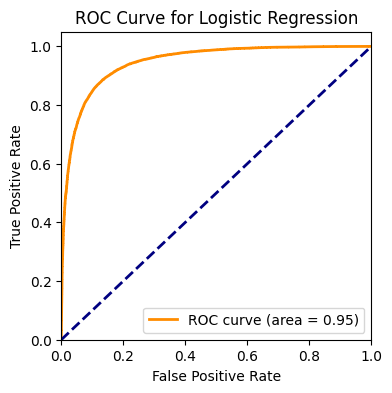

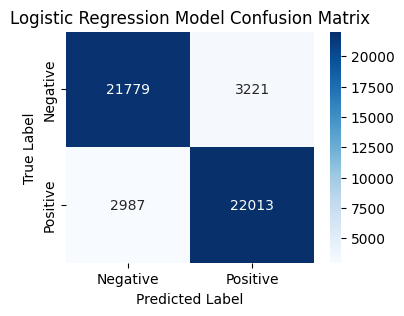

LogisticRegression trained with cross-validated accuracy of 0.87174, cross-validated F1 score of 0.87174, and cross-validated ROC AUC of 0.94236
accuries: [0.8732, 0.8702, 0.8726, 0.8707, 0.872], F1 values: [0.8731994927979712, 0.8701977102876095, 0.8725960046107044, 0.870697381621978, 0.8719937276926568], ROC AUC values: [0.9431401999999999, 0.9411448799999999, 0.9402348400000002, 0.94279744, 0.94449696]


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = None, max_iter = 2000)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], clf, 'Logistic Regression')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1
Training fold number 2
Training fold number 3
Training fold number 4
Training fold number 5


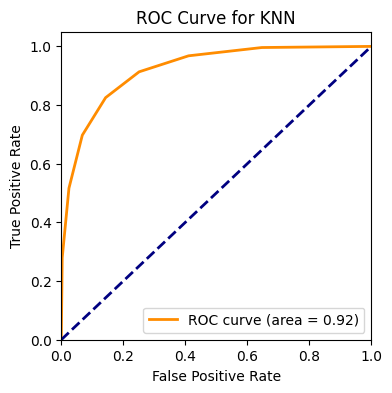

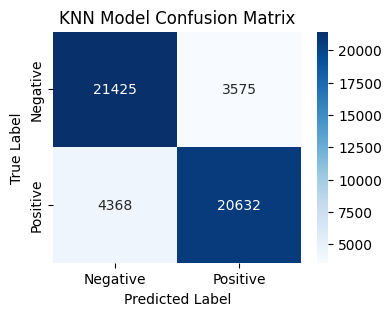

KNeighborsClassifier trained with cross-validated accuracy of 0.80098, cross-validated F1 score of 0.80091, and cross-validated ROC AUC of 0.87548
accuries: [0.7973, 0.8045, 0.8042, 0.8017, 0.7972], F1 values: [0.7972244681421383, 0.8043919754684524, 0.8041658778625588, 0.8016149940087828, 0.7971357244829451], ROC AUC values: [0.8739569000000001, 0.87730776, 0.87762816, 0.8756415399999999, 0.8728761999999999]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], knn, 'KNN')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1
Training fold number 2
Training fold number 3
Training fold number 4
Training fold number 5


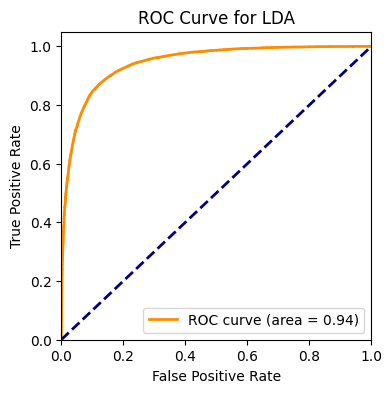

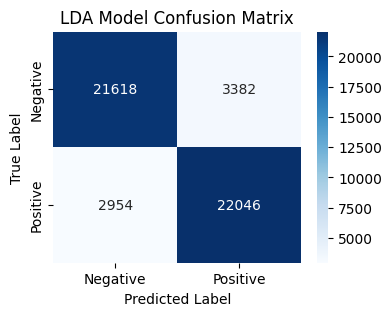

LinearDiscriminantAnalysis trained with cross-validated accuracy of 0.86928, cross-validated F1 score of 0.86927, and cross-validated ROC AUC of 0.94066
accuries: [0.8702, 0.8691, 0.869, 0.8676, 0.8705], F1 values: [0.8701972533738815, 0.8690914110874816, 0.8689817570198473, 0.8675910968253505, 0.870481037128646], ROC AUC values: [0.94106004, 0.94058042, 0.93898594, 0.9408036, 0.94187442]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = None)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], LDA, 'LDA')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1
Training fold number 2
Training fold number 3
Training fold number 4
Training fold number 5


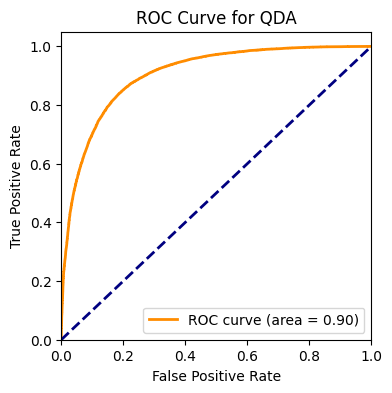

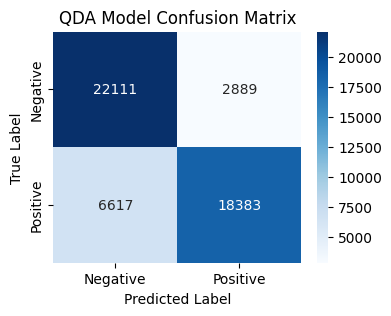

QuadraticDiscriminantAnalysis trained with cross-validated accuracy of 0.80864, cross-validated F1 score of 0.80757, and cross-validated ROC AUC of 0.90186
accuries: [0.8051, 0.8129, 0.8117, 0.806, 0.8075], F1 values: [0.8038915305843435, 0.8117694402002024, 0.8107807558823446, 0.804943386124903, 0.8064544183817026], ROC AUC values: [0.8996193399999999, 0.90345906, 0.9032764999999999, 0.90134062, 0.90161332]


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], QDA, 'QDA')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1
Training fold number 2
Training fold number 3
Training fold number 4
Training fold number 5


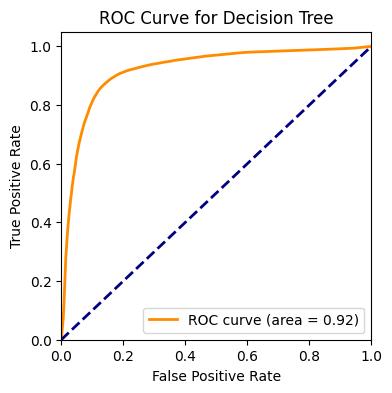

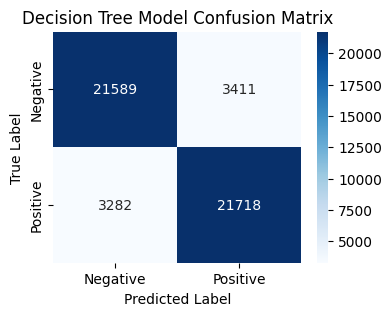

DecisionTreeClassifier trained with cross-validated accuracy of 0.769, cross-validated F1 score of 0.76899, and cross-validated ROC AUC of 0.81162
accuries: [0.767, 0.7704, 0.7676, 0.7693, 0.7707], F1 values: [0.7669981732656783, 0.7703966845281246, 0.7675738846016739, 0.7692914153335646, 0.7706999793629982], ROC AUC values: [0.8041173999999999, 0.8138885, 0.8081898, 0.81387856, 0.8180240200000001]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, min_samples_leaf = 2)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], tree_classifier, 'Decision Tree')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1
Training fold number 2
Training fold number 3
Training fold number 4
Training fold number 5


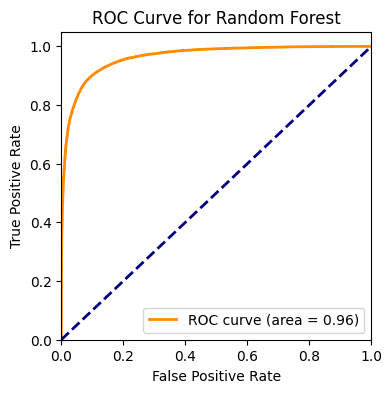

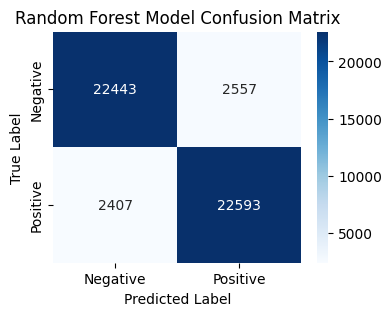

RandomForestClassifier trained with cross-validated accuracy of 0.8328, cross-validated F1 score of 0.83278, and cross-validated ROC AUC of 0.91181
accuries: [0.8343, 0.8351, 0.8343, 0.8275, 0.8328], F1 values: [0.8342850442252413, 0.8350886392563583, 0.8342697956702608, 0.827473898526108, 0.8327633684882336], ROC AUC values: [0.91051472, 0.9130750400000001, 0.91343632, 0.91023972, 0.91176524]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, min_samples_leaf = 2)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], clf, 'Random Forest')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

Training fold number 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training fold number 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training fold number 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training fold number 4


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training fold number 5


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


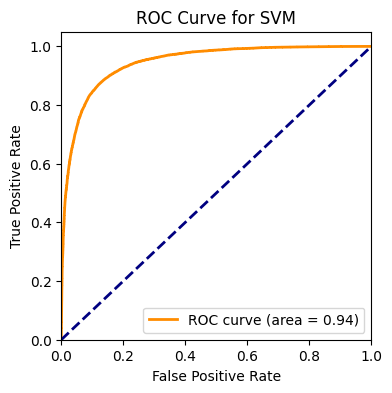

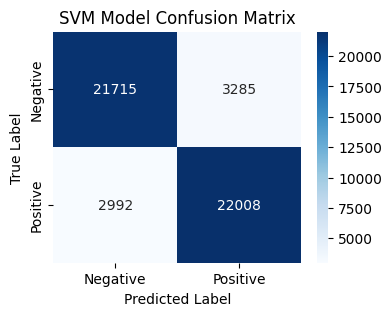

CalibratedClassifierCV trained with cross-validated accuracy of 0.87092, cross-validated F1 score of 0.87091, and cross-validated ROC AUC of 0.94204
accuries: [0.8719, 0.8704, 0.8717, 0.8691, 0.8715], F1 values: [0.8718995375573306, 0.8703962207537972, 0.8716945790959668, 0.8690963229157107, 0.8714868903776875], ROC AUC values: [0.9424805199999999, 0.94129124, 0.9398098400000001, 0.94250292, 0.9440998]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC(C = 25) # .fit(X_train, y_train)
clf = CalibratedClassifierCV(clf)

acc_values, f1_values, roc_auc_values, acc_avg, f1_avg, roc_auc_avg = test_classifier(np.vstack(df['doc_vector']), df['sentiment'], clf, 'SVM')

print(f'accuries: {acc_values}, F1 values: {f1_values}, ROC AUC values: {roc_auc_values}')

### Model Comparison

In [ ]:
'''
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lower_bound_list = []
upper_bound_list = []

lower_values = np.arange(1, 12)
upper_values = np.arange(11, 0, -1)

for lower in lower_values:
    for upper in upper_values:
        if lower < upper:
            lower_bound_list.append(lower)
            upper_bound_list.append(upper)

for i in range(len(lower_bound_list)):
    lower_bound = lower_bound_list[i]
    upper_bound = upper_bound_list[i]

    # Your existing code
    filtered_indices = np.argwhere((idf_scores > lower_bound) & (idf_scores < upper_bound))
    filtered_indices = [idx[0] for idx in filtered_indices]
    matrix2 = matrix[:, filtered_indices]

    X_train, X_test, y_train, y_test = train_test_split(matrix2, df.sentiment, test_size=0.2, random_state=32)

    clf = LogisticRegression().fit(X_train, y_train)
    logreg_predictions = clf.predict(X_test)
    accuracy = accuracy_score(logreg_predictions, y_test) * 100

    print(f'bounds: {lower_bound}, {upper_bound}, accuracy: {accuracy:.2f} %')
'''

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
			'gamma': [1, 0.1, 0.01, 0.001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
solver = ['lsqr', 'eigen']
shrinkage = [None, 'auto', 0.1, 0.5, 0.9]

best_accuracy = 0
best_params = {}

for solve in solver:
  for shrink in shrinkage:
    lda = LinearDiscriminantAnalysis(solver = solve, shrinkage = shrink)
    print(f'solver: {solve}, shrinkage: {shrink} ...')
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
      best_accuracy = acc
      best_params = {'solver': solve, 'shrinkage': shrink}

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

solver: lsqr, shrinkage: None ...
solver: lsqr, shrinkage: auto ...
solver: lsqr, shrinkage: 0.1 ...
solver: lsqr, shrinkage: 0.5 ...
solver: lsqr, shrinkage: 0.9 ...
solver: eigen, shrinkage: None ...
solver: eigen, shrinkage: auto ...
solver: eigen, shrinkage: 0.1 ...
solver: eigen, shrinkage: 0.5 ...
solver: eigen, shrinkage: 0.9 ...
Best Parameters:  {'solver': 'lsqr', 'shrinkage': None}
Best Accuracy:  0.8693


In [ ]:
reg_params = [0.0, 0.1, 0.5, 1.0]  # Regularization parameter for QDA

best_accuracy = 0
best_params = {}

for reg_param in reg_params:
    qda = QuadraticDiscriminantAnalysis(reg_param=reg_param)
    print(f'Regularization Parameter: {reg_param} ...')
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {'reg_param': reg_param}

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

Regularization Parameter: 0.0 ...
Regularization Parameter: 0.1 ...
Regularization Parameter: 0.5 ...
Regularization Parameter: 1.0 ...
Best Parameters:  {'reg_param': 0.1}
Best Accuracy:  0.8064


In [ ]:
max_depths = [None, 5, 10, 15]  # Maximum depth of the tree
min_samples_splits = [2, 5, 10]  # Minimum number of samples required to split an internal node
min_samples_leaves = [1, 2, 4]  # Minimum number of samples required to be at a leaf node

best_accuracy = 0
best_params = {}

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            tree_classifier = DecisionTreeClassifier(
                random_state=42,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            print(f'Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf} ...')
            tree_classifier.fit(X_train, y_train)
            y_pred = tree_classifier.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1 ...
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2 ...
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4 ...
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1 ...
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2 ...
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4 ...
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1 ...
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2 ...
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4 ...
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1 ...
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2 ...
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 4 ...
Max Depth: 5, Min Samples Split: 5, Min Samples Leaf: 1 ...
Max Depth: 5, Min Samples Split: 5, Min Samples Leaf: 2 ...
Max Depth: 5, Min Samples Split: 5, Min Samples Leaf: 4 ...
Max Depth: 5, Min Samples Split: 10, Min Samples Leaf: 1 ...
Max Depth

In [ ]:
C_values = [0.1, 1.0, 5.0, 10.0]  # Regularization parameter

best_accuracy = 0
best_params = {}

for C_value in C_values:
    # Create a linear SVM
    svm_classifier = LinearSVC(C=C_value)

    # Wrap the SVM with probability calibration
    calibrated_svm = CalibratedClassifierCV(estimator=svm_classifier, method='sigmoid')

    print(f'Regularization Parameter (C): {C_value} ...')

    # Train the model on the training set
    calibrated_svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = calibrated_svm.predict(X_test)

    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)

    # Check if the current combination is the best so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {'C': C_value}

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

Regularization Parameter (C): 0.1 ...
Regularization Parameter (C): 1.0 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization Parameter (C): 5.0 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization Parameter (C): 10.0 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters:  {'C': 10.0}
Best Accuracy:  0.8728


In [ ]:
C_values = [10, 20, 50, 100]  # Regularization parameter

best_accuracy = 0
best_params = {}

for C_value in C_values:
    # Create a linear SVM
    svm_classifier = LinearSVC(C=C_value)

    # Wrap the SVM with probability calibration
    calibrated_svm = CalibratedClassifierCV(estimator=svm_classifier, method='sigmoid')

    print(f'Regularization Parameter (C): {C_value} ...')

    # Train the model on the training set
    calibrated_svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = calibrated_svm.predict(X_test)

    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)

    # Check if the current combination is the best so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {'C': C_value}

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

Regularization Parameter (C): 10 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization Parameter (C): 20 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization Parameter (C): 50 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Regularization Parameter (C): 100 ...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters:  {'C': 20}
Best Accuracy:  0.8747


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
